In [53]:
import pandas as pd
import pickle
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# df = pd.read_csv('C:/Saravana/Data/Raw/2016.log')
df = pd.read_pickle('C:/Saravana/Data/Raw/export-cleansed-4851f054c66579780503d70880731802.pkl.bz2')
display(df.head())

,IMP_ID,GJ,IMPORT,MUFO_REFERENZ_N,BARCODE_NR,VERANST_SEGMENT,REKLA_JN,VG_DATUM_VON,VG_ORT,VG_RAUM,...,VERANST_ORT,NUTZLIZNEHM_GESCHAEFTSZEICHEN,NUTZLIZNEHM_NAME,NUTZLIZNEHM_VORNAME,NUTZLIZNEHM_STRASSE,NUTZLIZNEHM_PLZ,NUTZLIZNEHM_ORT,LOCATION,BAND,PROMOTER
ID,,,,,,,,,,,,,,,,,,,,,
9938765,24643,2016,ABRE U INKA 2016,NaN,5027961220,4.0,NONRekla,2014-02-09,LISBERG,TURNHALLE SV RW LISBERG,...,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,NaN,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938766,24643,2016,ABRE U INKA 2016,NaN,5027961235,6.0,NONRekla,2014-02-08,LISBERG,TURNHALLE SV RW LISBERG,...,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,DAS BOEHMISCHE FEUER,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938851,24643,2016,ABRE U INKA 2016,NaN,5044481411,3.0,NONRekla,2014-03-15,MUENCHEN,WERNER-VON-SIEMENS-SCHULZENTRUM,...,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN WERNER-VON-SIEMENS-SCHULZENTRUM,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938852,24643,2016,ABRE U INKA 2016,NaN,5044481427,2.0,NONRekla,2014-03-14,MUENCHEN,PFARRHEIM UND KIRCHE,...,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN PFARRHEIM UND KIRCHE,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938853,24643,2016,ABRE U INKA 2016,NaN,5044481469,2.0,NONRekla,2014-02-09,GRAFENRHEINFELD,KULTURHALLE GRAFENRHEINFELD,...,WERNECK,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,GRAFENRHEINFELD KULTURHALLE GRAFENRHEINFELD,NaN,MUSIKVEREIN WERNECK E.V 97440


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.VERANST_SEGMENT.unique()

In [ ]:
df.VG_RAUM.unique()

In [ ]:
len(df.index)

In [4]:
# Filter segment 2(0-50 euros) & segment 3(50-100 euros) 

lowerclaim_df = df.query('VERANST_SEGMENT <= 3')
len(lowerclaim_df.index)

2029523

In [ ]:
display(lowerclaim_df.columns)
# Count NaN values for each column in the dataframe
display(lowerclaim_df.isna().sum())

In [ ]:
IMP_ID                                 
GJ                               GeschäftsJahr      
IMPORT                           Distribution where the data came from      
MUFO_REFERENZ_N                  
BARCODE_NR                             
VERANST_SEGMENT                  Event segment
REKLA_JN                         Reclamation 
VG_DATUM_VON                     Event Date
VG_ORT                           Event place
VG_RAUM                          Event room

NUTZFALL                         Usage of event or 
NUTZFALL_RAUM                    Use case Room or Music hall where the music is used

MUSIKLEITER_NAME                 Music Leader name
KAPELLE_NAME                     Chapel name

TARIF_NR                         Tariff Number
TARIF_BEZ                        Tariff Bez
NUTZFALL_NR                      Usecase Number

VG_INKASSO                       Event collection
INKASSO_NETTO                    Net-Collection
INKASSO_BRUTTO                   Gross-Collection
VERANST_GESCHAEFTSZEICHEN        Event business sign or mark 
VERANST_NAME                     Event name
VERANST_STRASSE                  Event street
VERANST_PLZ                      Event post code
VERANST_ORT                      Event place

# Nutzungs Lizenznehmer - someone who has got the license(Usage licence) for the music works
NUTZLIZNEHM_GESCHAEFTSZEICHEN    
NUTZLIZNEHM_NAME                 name of person who aquired usage license
NUTZLIZNEHM_VORNAME              surname of person who aquired usage license
NUTZLIZNEHM_STRASSE              street of person who aquired usage license
NUTZLIZNEHM_PLZ                  postcode of person who aquired usage license
NUTZLIZNEHM_ORT                  place of person who aquired usage license

LOCATION                         location - VG_ORT + VG_RAUM
BAND                             band - KAPELLE_NAME and empty rows of kapelle name is filled with MUSIKLEITER_NAME
PROMOTER                         promoter - VERANST_NAME + VERANST_PLZ

VG_RAUM = 'IM FREIEN'(In Outside) or Name of the City


In [ ]:
print(lowerclaim_df['VG_INKASSO'].max())
print(lowerclaim_df['VG_INKASSO'].min())

Univariate Plotting - Distribution of the event collection in Euros

In [ ]:
# kde - Kernel Density
sns.displot(lowerclaim_df['VG_INKASSO'], kde=False)
plt.show()

VG_ORT

In [5]:
# Find the values seperated by comma
contains_comma = lowerclaim_df[lowerclaim_df['VG_ORT'].str.contains(',') == True]
non_comma_df = lowerclaim_df[lowerclaim_df['VG_ORT'].str.contains(',') == False]
print(len(contains_comma))
print(len(contains_comma['VG_ORT'].unique()))
print(contains_comma['VG_ORT'])
splitted_with_comma = contains_comma['VG_ORT'].str.split(r",", expand=True)
print(len(splitted_with_comma[0].unique()))
print(splitted_with_comma[0])

12509
244
ID
9940000                             MUENSTER, WESTF
9940329                              KERPEN, RHEINL
9944916                       SALZWEDEL, HANSESTADT
9944920                                 DESSAU, ANH
9947304                             STEINACH, THUER
9947646                              MEISSEN, SACHS
9947869                      GREIFSWALD, HANSESTADT
9947870                      GREIFSWALD, HANSESTADT
9947912                                 DESSAU, ANH
9948755                             HATTINGEN, RUHR
9949648                      GREIFSWALD, HANSESTADT
9950616                                  HOF, SAALE
9951615                              DUEREN, RHEINL
9952284                            ALTENBURG, THUER
9952340                                DOHNA, SACHS
9952343                            SONNEBERG, THUER
9953646                                 ESSEN, RUHR
9953675                             ARNSBERG, WESTF
9953706                            BARCHFELD, WERRA

In [6]:
print("--------Non-commma-values--------")
print('No. of non-comma values : {}'.format(len(non_comma_df)))
print('Non-comma unique values : {}'.format(len(non_comma_df['VG_ORT'].unique())))
non_splitted_places = non_comma_df['VG_ORT']
place_df = pd.concat([non_splitted_places,splitted_with_comma[0]])
print('The number of unique places: {}'.format(len(place_df.unique())))
# display('NaN values in df_raw : {}, NaN values in df: {}'.format(df_raw['VG_INKASSO'].isna().sum(), df['VG_INKASSO'].isna().sum()))

--------Non-commma-values--------
No. of non-comma values : 2016868
Non-comma unique values : 11355
The number of unique places: 11421


In [ ]:
import geocoder

In [ ]:
g = geocoder.google('Bad Marienberg')
print(g.geojson)
print(g.json)
print(g.wkt)
print(g.osm)

google maps API
how big the city is?
how close the location to the city centre?

In [ ]:
gd = geocoder.google([45.15, -75.14], method='reverse')
print(gd.city)

VG_RAUM

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgopalakrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

In [8]:
# Find all the categories of VG_RAUM
lowerclaim_df['VG_RAUM_clean']=lowerclaim_df['VG_RAUM'].astype(str).fillna('').map(lambda x: re.sub(r'\W+', ' ', x))
lowerclaim_df['VG_RAUM_tokenized']=lowerclaim_df['VG_RAUM_clean'].apply(word_tokenize, language='german')

flat_list = [item for sublist in lowerclaim_df['VG_RAUM_tokenized'].tolist() for item in sublist]

C:\Users\sgopalakrish\AppData\Local\Temp\ipykernel_28108\3448198663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowerclaim_df['VG_RAUM_clean']=lowerclaim_df['VG_RAUM'].astype(str).fillna('').map(lambda x: re.sub(r'\W+', ' ', x))
C:\Users\sgopalakrish\AppData\Local\Temp\ipykernel_28108\3448198663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowerclaim_df['VG_RAUM_tokenized']=lowerclaim_df['VG_RAUM_clean'].apply(word_tokenize, language='german')


In [9]:
german_stop_words = stopwords.words('german')

In [10]:
cleaned_german_stop_words = []
def remove_special_chars_from_german_stopwords():
    for each in german_stop_words:
        each = each.replace('ß','SS')
        each = each.upper()
        each = each.replace('Ä', 'AE')
        each = each.replace('Ö', 'OE')
        each = each.replace('Ü', 'UE')
        
        cleaned_german_stop_words.append(each)

In [11]:
remove_special_chars_from_german_stopwords()
text_wo_stop_words = [word for word in flat_list if word.lower() not in cleaned_german_stop_words]

additional_stopwords = [
    'ST', 'FREIEN', 'BAD', 'HAUS', 'EV', 'BERLIN', 'KATH', 'S', 'HOF', 'ALTE', 'MITTE', 'LUTH', 'MUENCHEN',
    'IRISH', 'MUSIK', 'KULTUR', 'FUER', 'EVANG', 'MARITIM', 'KOELN', 'U', 'TURN', 'E', 'STUTTGART', 'ALTES',
    'A', 'GASTES', 'THE', 'EUROPA', 'HANNOVER', 'STADT', 'BADEN', 'NUERNBERG', 'HAMBURG', 'NEUE',
    'EVANGELISCHE', 'LEIPZIG', 'B', 'DRESDEN', 'BREMEN', 'PETER', '1','ALTER'
]

text_wo_stop_words_2 = [word for word in text_wo_stop_words if word not in additional_stopwords]

text_wo_stop_words_3 = ['KIRCHE' if 'KIRCHE' in word else word for word in text_wo_stop_words_2 ]

# display(text_wo_stop_words_3)

<FreqDist with 63778 samples and 4087468 outcomes>


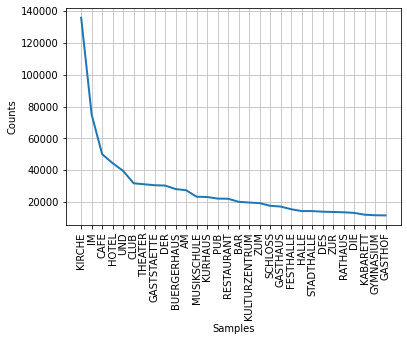

In [12]:
fdist_raum = FreqDist(text_wo_stop_words_3)
print(fdist_raum)

fdist_raum.plot(30,cumulative=False)

plt.show()

In [13]:
print('Unique band values: {}'.format(len(lowerclaim_df.BAND.unique())))
# Null band values = 943181
# Total Band values = 2029523
print('Total non null band count: {}'.format(2029523-943181))


Unique band values: 241548
Total non null band count: 1086342


In [14]:
all_german_stopwords = cleaned_german_stop_words + additional_stopwords

room_list_wo_stopwords = []
for each_room in lowerclaim_df['VG_RAUM_clean'].tolist():
    for each_stopword in all_german_stopwords:
        # Remove stopword from each row in VG_RAUM_clean 
        each_room.replace(each_stopword,'')
        
    if 'KIRCHE' in each_room:
        room_list_wo_stopwords.append('KIRCHE')
    else:
        room_list_wo_stopwords.append(each_room)

In [15]:
joined_text_wo_stopwords = ','.join(room_list_wo_stopwords)

In [35]:
lowerclaim_df['VG_RAUM_WO_STOPWORDS'] = room_list_wo_stopwords

C:\Users\sgopalakrish\AppData\Local\Temp\ipykernel_28108\2397822885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowerclaim_df['VG_RAUM_WO_STOPWORDS'] = room_list_wo_stopwords


### Get keywords Using Rake

In [ ]:
from rake_nltk import Rake

In [ ]:
r = Rake()

r.extract_keywords_from_text(joined_text_wo_stopwords)
rankedList = r.get_ranked_phrases_with_scores()

In [ ]:
keywordList           = []

for keyword in rankedList:
  keyword_updated       = keyword[1].split()
  keyword_updated_string    = " ".join(keyword_updated[:2])
  keywordList.append(keyword_updated_string)
#   if(len(keywordList)>9):
#     break
# print(keywordList)

In [ ]:
most_common_list = Counter(keywordList).most_common(30)

keyword_list = []
counts = []

for each in most_common_list:
    keyword_list.append(each[0])
    counts.append(each[1])


plt.plot(keyword_list, counts)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fdist_vg_raum_rake = FreqDist(most_common_list)
fdist_vg_raum_rake.plot(30,cumulative=False)

# plt.show()

In [ ]:
(73.15166945520723, 'view 200 dortmunder u 7 og leonie reygers terrasse 44137 dortmun'), 
(73.15166945520723, 'view 200 dortmunder u 7 og leonie reygers terrasse 44137 dortmun'), 
(73.15166945520723, 'view 200 dortmunder u 7 og leonie reygers terrasse 44137 dortmun'),
(63.331820639281666, 'real pc 2319 1003 ks 49 1003 9000 saarbruecken'), 
(63.331820639281666, 'real pc 2319 1003 ks 49 1003 9000 saarbruecken'), 
(58.33024052020611, 'praeparandie sinzig praxis fuer psychiatrie neurologie und imp gespr'), 
(58.32403096060591, 'real pc 2319 1955 ks 49 1955 9000'), 
(58.32403096060591, 'real pc 2319 1955 ks 49 1955 9000'), 
(58.32403096060591, 'real pc 2319 1732 ks 49 1732 9000'), 
(58.32403096060591, 'real pc 2319 1732 ks 49 1732 9000'), 
(58.32403096060591, 'real pc 2319 1716 ks 49 1716 9000'), 
(58.32403096060591, 'real pc 2319 1716 ks 49 1716 9000'), 
(57.83704866897864, 'leistungsempfaenger hoeffner moebelges gmbh co kg pankstr 32 13357 b'),
(56.887636709347206, 'moog 100 dortmunder u eg leonie reygers terrasse 44137 dortmund'), 
(56.527632852372335, 'hoeffner moebelges gmbh co kg rabenaustr 3 9 63584 gruendau'), 
(55.000939752317215, 'seelandhallen achtern diek gaestezentrum und spiel und spass scheun'), 
(54.97274199708599, 'bar ick koof mir dave lombardo wenn ick reich bin'), 
(53.74321256251726, 'leistungsempfaenger hoeffner moebelges gmbh co kg holsteiner ch 130'), 
(53.22730842308371, 'leistungsempfaenger hoeffner moebelges gmbh cokg inder schmalau40 9076'), 
(53.22730842308371, 'leistungsempfaenger hoeffner moebelges gmbh cokg inder schmalau40 9076'), 
(53.22730842308371, 'leistungsempfaenger hoeffner moebelges gmbh cokg inder schmalau40 9076'), 
(53.03487922918392, 'leistungsempfaenger hoeffner moebelges gmbh co kg hansestr 28 18182'), 
(53.01198737064888, 'europaeische stiftung der rahn dittrich group fuer bildung und kultur'), 
(53.01198737064888, 'europaeische stiftung der rahn dittrich group fuer bildung und kultur'), 
(50.92969436071396, 'zk u zentrum fuer kunst und urbanistik im ehem gueterbahnhof moabit'), 
(50.92969436071396, 'zk u zentrum fuer kunst und urbanistik im ehem gueterbahnhof moabit'), 
(50.92969436071396, 'zk u zentrum fuer kunst und urbanistik im ehem gueterbahnhof moabit'), 
(50.51442642054456, 'private kliniken dr dr med nebel vogtland klinik bad elster'), 
(50.51442642054456, 'private kliniken dr dr med nebel vogtland klinik bad elster'), 
(50.51442642054456, 'private kliniken dr dr med nebel vogtland klinik bad elster'),  
(50.51442642054456, 'private kliniken dr dr med nebel vogtland klinik bad elster')


In [ ]:
# Stemming - removes suffixes and prefixes from word roots, 
# Lemmatization - maps the remaining root forms (which may not always be proper words) back to an actual word that occurs in natural language.

Get keywords using spacy

In [17]:
import spacy
from string import punctuation

In [32]:
nlp = spacy.load('de_core_news_sm')
nlp.max_length = 36450436

In [33]:
def get_hotwords(text):
    result = []
    # pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    # pos_tag = ['NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        # if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
        #     continue
        # if(token.pos_ in pos_tag):
        #     result.append(token.text)
        
        print(token.text, token.pos_,token.dep_)    
    return result

In [50]:
def get_keywords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    # pos_tag = ['NOUN'] 
    # doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
        
        # print(token.text, token.pos_,token.dep_)    
    return result

In [16]:
len(joined_text_wo_stopwords)

36450434

In [51]:
raum_cleaned_df = (row.VG_RAUM_WO_STOPWORDS for row in lowerclaim_df.itertuples())
output = []
for doc in nlp.pipe(raum_cleaned_df):
  output.append(get_keywords(doc))


NameError: name 'Counter' is not defined

In [59]:
flat_output_list = [item for sublist in output for item in sublist]

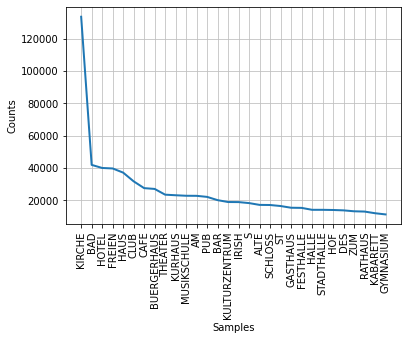

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
fdist_vg_raum_spacy = FreqDist(flat_output_list)
fdist_vg_raum_spacy.plot(30,cumulative=False)

In [62]:
freq_words = Counter(flat_output_list).most_common(100)
for item in freq_words:
  print(item[0])

KIRCHE
BAD
HOTEL
FREIEN
HAUS
CLUB
CAFE
BUERGERHAUS
THEATER
KURHAUS
MUSIKSCHULE
AM
PUB
BAR
KULTURZENTRUM
IRISH
S
ALTE
SCHLOSS
ST
GASTHAUS
FESTHALLE
HALLE
STADTHALLE
HOF
DES
ZUM
RATHAUS
KABARETT
GYMNASIUM
KULTUR
MITTE
TURNHALLE
MEHRZWECKHALLE
GASTHOF
MUSIK
GASTES
PARK
GASTSTAETTE
MUENCHEN
VEREINSHEIM
SCHULE
WANDELHALLE
MUSEUM
ALTES
GRUNDSCHULE
FUER
BERLIN
STAATSBAD
THE
FESTZELT
GEMEINDEHALLE
JAZZ
DER
TURN
RESTAURANT
KATH
DORFGEMEINSCHAFTSHAUS
ZENTRUM
GEMEINDEHAUS
BISTRO
GALERIE
SCHUETZENHALLE
JUGENDZENTRUM
KURPARK
SCHLACHTHOF
BRAUHAUS
VILLA
FORUM
JAZZCLUB
LANDGASTHOF
SCHUETZENHAUS
SCHEUNE
CIRCUS
BEGEGNUNGSSTAETTE
BUERGERZENTRUM
EUROPA
STUTTGART
WIRTSHAUS
MUSIC
ZELT
HOCHSCHULE
SAAL
KRONE
GEMEINDEZENTRUM
BAHNHOF
KULTURHAUS
BUERGERSAAL
MUEHLE
KLEINKUNSTBUEHNE
HAMBURG
STADT
LIVE
SPORTHALLE
BURG
E
FABRIK
EUROPACENTER
ALTER
SPORTHEIM


In [67]:
len(set(flat_output_list))

3837356

In [34]:
output = set(get_hotwords(joined_text_wo_stopwords))

freq_words = Counter(output).most_common(10)
for item in freq_words:
  print(item[0])

MemoryError: Error assigning 1258292400 bytes

In [ ]:
# Group the places by the state
# Find the missing places using the PLZ or using the VG_Raum

In [ ]:
# There are only 2 values in the INKASSO_NETTO and INKASSO_BRUTTO
# There are no null values in VG_INKASSO
# Lowest value of VG_INKASSO is 0.04 and highest value is 409.7
# How could segment 2 (0 - 50 euros) and segment 3 (50-100 euros) would have high VG_INKASSO values?


In [ ]:
morethan100 = lowerclaim_df[lowerclaim_df['VG_INKASSO']>100]
len(morethan100)

Multivariate Analysis

In [ ]:
# Null values
# VG_ORT - 146
# VERANST_ORT  368
# VG_RAUM/LOCATION - 95
# VERANST_NAME/PROMOTER  103
# TARIF_BEZ  0
# BAND  943181
# KAPELLE_NAME 960942
# sns.barplot(x=lowerclaim_df['VG_ORT'], y=df['VERANST_SEGMENT'])
# plt.show()

#box plot Place/Customer Segment
data = pd.concat([lowerclaim_df['VG_ORT'], df['VERANST_SEGMENT']], axis=1)
f, ax = plt.subplots(figsize=(80, 6))
fig = sns.boxplot(x="VG_ORT", y="VERANST_SEGMENT", data=data)
plt.xticks(rotation=90)

In [ ]:
# sns.barplot(x=lowerclaim_df['TARIF_BEZ'], y=df['VERANST_SEGMENT'])
# plt.show()
#box plot Tarif/Customer Segment
data = pd.concat([lowerclaim_df['TARIF_BEZ'], df['VERANST_SEGMENT']], axis=1)
f, ax = plt.subplots(figsize=(80, 8))
fig = sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", data=data)
# fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
# 54 Tarifs used frequently

In [ ]:
# Find the relationship between tarif, customer segment and the band that performed
sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", hue="BAND", data=lowerclaim_df);

In [ ]:
# Find the relationship between tarif, customer segment and the location the event was performed
sns.boxplot(x="TARIF_BEZ", y="VERANST_SEGMENT", hue="LOCATION", data=lowerclaim_df);

Relationship with features

Correlation

In [ ]:
# Find correlation of customer segments and other variables
lowerclaim_df.corr()['VERANST_SEGMENT'].sort_values(ascending=False)

In [ ]:
# Find correlation of VG_INKASSO and other variables
lowerclaim_df.corr()['VG_INKASSO'].sort_values(ascending=False)

In [ ]:
lowerclaim_df.corr()

In [ ]:
sns.heatmap(lowerclaim_df.corr(), cmap='coolwarm')

Outliers